In [1]:
from pandas_datareader import data,wb
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2020,1,1)

In [3]:
BAC=data.DataReader('BAC','yahoo',start,end)
C=data.DataReader('C','yahoo',start,end)
GS=data.DataReader('GS','yahoo',start,end)
JPM=data.DataReader('JPM','yahoo',start,end)
WFC=data.DataReader('WFC','yahoo',start,end)

In [18]:
C

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,436.462433
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,428.404449
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,430.529663
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370200.0,430.529663
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680700.0,428.493073
...,...,...,...,...,...,...
2019-12-24,78.940002,78.459999,78.699997,78.589996,4576200.0,76.477905
2019-12-26,79.839996,78.650002,78.750000,79.830002,11992800.0,77.684586
2019-12-27,80.180000,79.580002,80.000000,79.669998,10867900.0,77.528885


In [5]:
tickers=['BAC','C','GS','JPM','WLS']

In [6]:
bank_stocks=pd.concat([BAC,C,GS,JPM,WFC],axis=1,keys=tickers)

In [7]:

bank_stocks.columns.names=['Bank ticker','Stock info']
bank_stocks.head()

Bank ticker        BAC                                               \
Stock info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank ticker                      C                                      ...  \
Stock info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   

Bank ticker        JPM                                          WLS  \
Stock info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2006-01-03   39.830002  40.189999  12838600.0  27.264044  31.975000   
2006-01-04   39.779999  39.619999  13491500.0  27.106680  31.820000   
2006-01-05   39.610001  39.740002   8109400.0  27.188778  31.555000   
2006-01-06   39.919998  40.020000   7966900.0  27.380350  31.775000   
2006-01-09   39.880001  40.669998  16575200.0  27.825054  31.825001   

Bank ticker                                                          
Stock info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.818630  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.577162  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.554317  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.675053  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.671791  

[5 rows x 30 columns]

In [8]:
for t in tickers:#stock with max close values
    print(t,':',bank_stocks[t]['Close'].max())

BAC : 54.900001525878906
C : 564.0999755859375
GS : 273.3800048828125
JPM : 139.39999389648438
WLS : 65.93000030517578


In [9]:
bank_stocks.xs(key='Close',axis=1,level='Stock info').max()
re=pd.DataFrame()

In [10]:
for t in tickers:
    re[t+' Return']=bank_stocks[t]['Close'].pct_change()#making new coloumn in dataframe
re    

,BAC Return,C Return,GS Return,JPM Return,WLS Return
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,-0.000158
...,...,...,...,...,...
2019-12-24,0.001422,-0.002159,0.003579,0.002770,0.000186
2019-12-26,0.008518,0.015778,0.005654,0.010612,0.006132
2019-12-27,-0.004786,-0.002004,-0.002379,0.000719,-0.004248


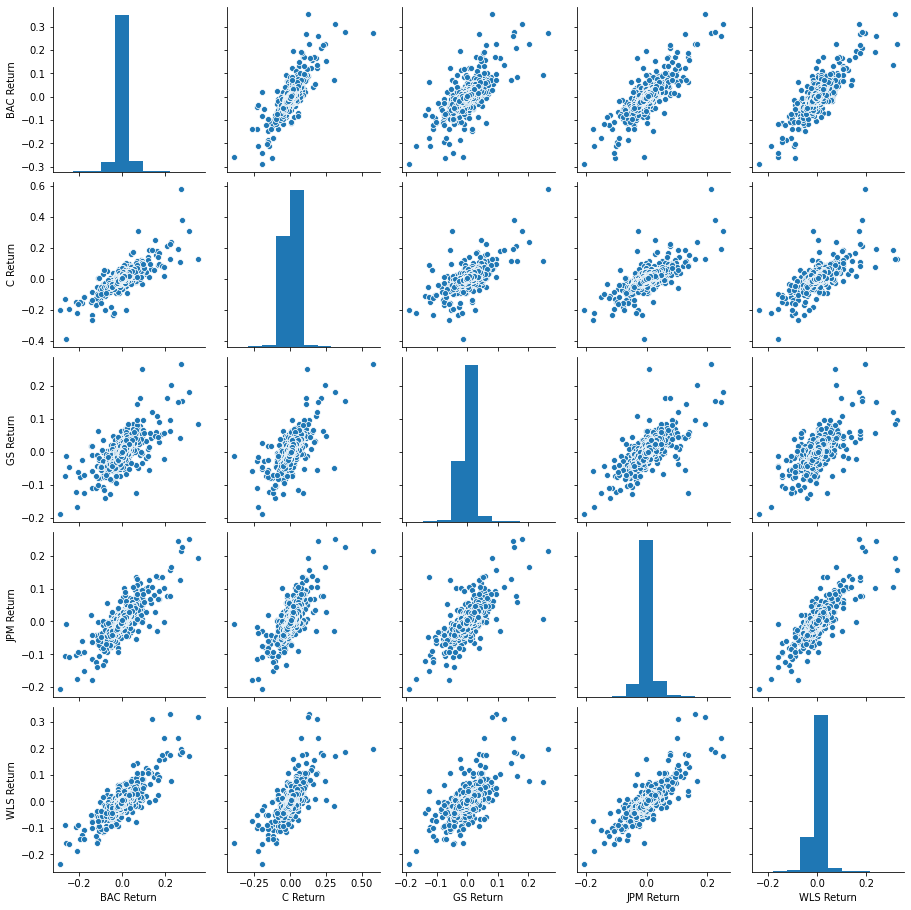

In [11]:
sns.pairplot(re[1:])

In [12]:
re.idxmin()#it will give the date on which prices of stock are lowest

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
WLS Return   2009-01-20
dtype: datetime64[ns]

In [13]:
re.idxmax()#it will give the date on which prices of stock are highest

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
WLS Return   2008-07-16
dtype: datetime64[ns]

In [14]:
re.std()#it will give riskiest stock(stock with highest standard deviation)

BAC Return    0.032158
C Return      0.033750
GS Return     0.022946
JPM Return    0.024401
WLS Return    0.026551
dtype: float64

In [27]:
bank_stocks.ix['2015-01-01':'2016-01-01']
re.ix['2015-01-01':'2016-01-01']
re

AttributeError: 'DataFrame' object has no attribute 'ix'

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

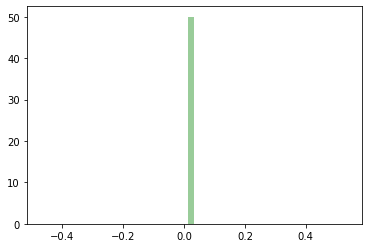

In [19]:
sns.distplot(re.std()['C Return'],color='green',bins=50)

In [20]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning:


The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor relea

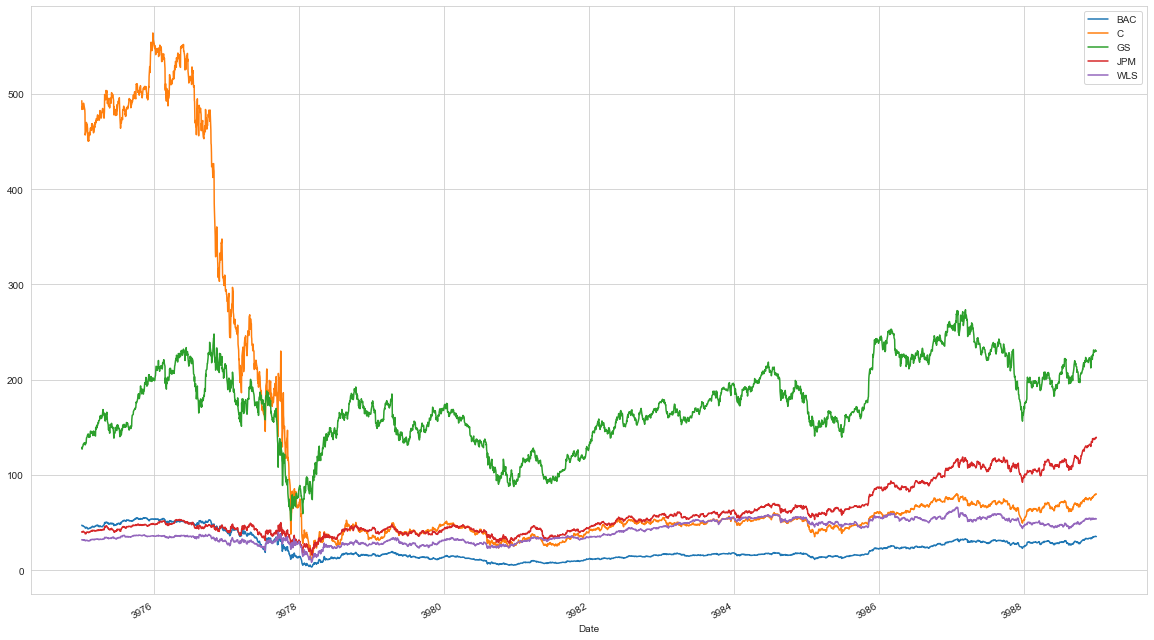

In [21]:
####more visualization
for t in tickers:
    bank_stocks[t]['Close'].plot(label=t,figsize=(20,12))
plt.legend()    

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock info').iplot()

<AxesSubplot:xlabel='Bank ticker', ylabel='Bank ticker'>

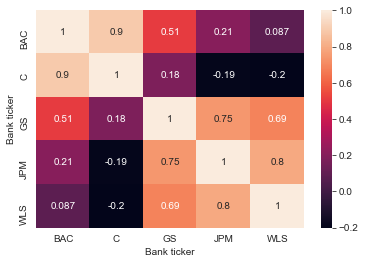

In [23]:
#####moving averages
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock info').corr(),annot=True)

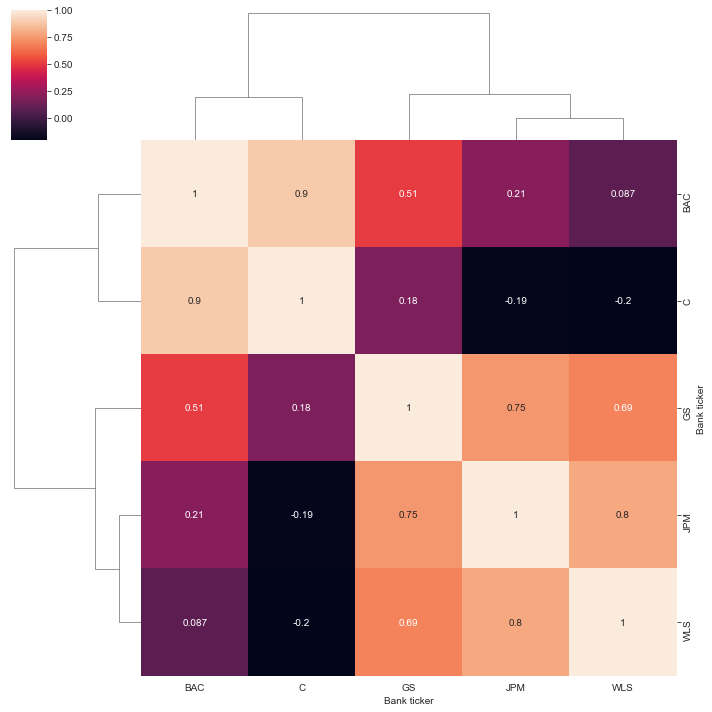

In [24]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock info').corr(),annot=True)

In [28]:
#ploty library heatmaps
close_cu=bank_stocks.xs(key='Close',axis=1,level='Stock info').corr()
close_cu.iplot(kind='heatmap',colorscale='rdylbu')
close_cu

Bank ticker,BAC,C,GS,JPM,WLS
Bank ticker,,,,,
BAC,1.000000,0.895405,0.510580,0.210511,0.086808
C,0.895405,1.000000,0.180978,-0.190878,-0.201204
GS,0.510580,0.180978,1.000000,0.746165,0.690309
JPM,0.210511,-0.190878,0.746165,1.000000,0.798138
WLS,0.086808,-0.201204,0.690309,0.798138,1.000000
